In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 15 ##

## Probability ##

In [7]:
# Discussion Question (a):
# P(Rick and Morty both appear)
# there are two ways of Rick and Morty appearing
# 1. Rick 2. Morty 
#OR
# 1. Morty 2. Rick
# = P(Rick, then Morty) + P(Morty, then Rick)
((1/100 * 1/99) + (1/100 * 1/99)) * 100
# probability of me selecting rick and morty
# is 0.02%

0.0202020202020202

In [8]:
# Discussion Question (b)
# P(neither Rick nor Morty appears)
(98/100 * 97/99)*100
# 96% probability of selecting neither Rick  nor Morty in our sample

96.02020202020202

In [9]:
0.0202020202020202 + 96.02020202020202


96.04040404040404

In [ ]:
# try
# what is probability of selecting rick and not morty

In [ ]:
# and probability of selecting morty and not rick


In [ ]:
# do these combined probabilities then add up to 100%?


## Random Sampling ##

In [13]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united
# united flights in the summer of 2015

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [14]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [15]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [16]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


In [17]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
965,6/7/15,1215,DEN,4
1965,6/14/15,394,LAS,0
2965,6/20/15,1662,BOS,21
3965,6/27/15,586,DEN,-6
4965,7/4/15,693,IAH,-9
5965,7/10/15,1944,EWR,5
6965,7/17/15,1182,LAX,0
7965,7/24/15,294,DFW,0
8965,7/30/15,1497,SEA,78
9965,8/6/15,258,MSP,-4


In [ ]:
# above are all examples of a deterministic sample

# not involving chance

## Distributions ##

In [19]:
die = Table().with_column('Face', np.arange(1,7))
die

Face
1
2
3
4
5
6


In [20]:
die.sample(10) # random sample with sample size = 10
# when we use the sample function, default is to sample WITH replacement

Face
2
3
4
6
2
4
3
2
2
5


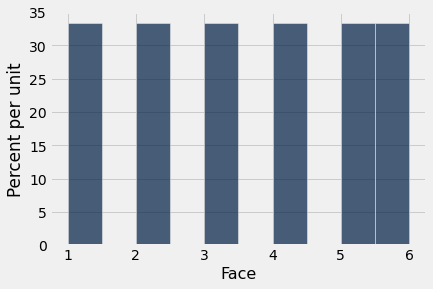

In [21]:
die.hist()
# theoretical probability
# probability distribution

# notice how our 5 and 6 bin are squished together
# just a quirk of .hist
# since our end bounds are 1 and 6

In [22]:
roll_bins = np.arange(0.5, 6.6, 1)
# histogram x-axis is going to go from 0.5 to 6.6

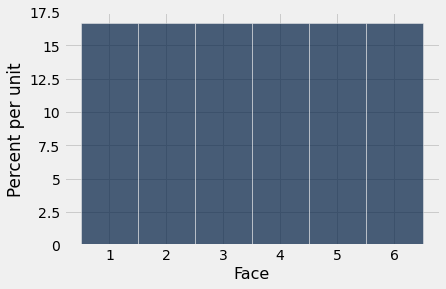

In [23]:
die.hist(bins = roll_bins)
# probability distirbution of our die

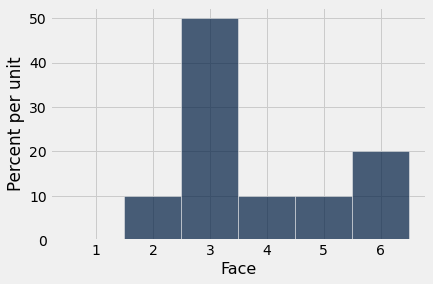

In [24]:
die_sample = die.sample(10)
die_sample.hist(bins = roll_bins)
# empirical distirbution
# collection of our simulated rolls of a die

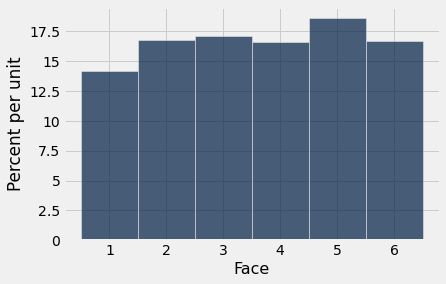

In [25]:
die_sample = die.sample(1000)
die_sample.hist(bins = roll_bins)
# empirical distirbution
# collection of our simulated rolls of a die

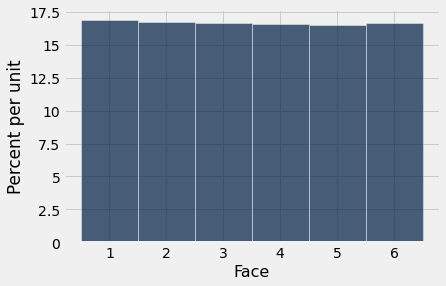

In [26]:
die_sample = die.sample(100000)
die_sample.hist(bins = roll_bins)
# empirical distirbution
# collection of our simulated rolls of a die

# as our sample size increases, our empircal distribution looks more and more similar
# to our probability distribution

In [27]:
30000*.3

9000.0

## Large Random Samples ##

In [30]:
united.sort('Delay', descending = True)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580
3154,6/22/15,300,HNL,537
3069,6/21/15,1149,IAD,508
2888,6/20/15,353,ORD,505
12627,8/23/15,1589,ORD,458
7949,7/23/15,1960,LAX,438
3412,6/23/15,1606,ORD,430
578,6/4/15,1743,LAX,408
2474,6/17/15,1122,HNL,405
8426,7/27/15,572,ORD,385


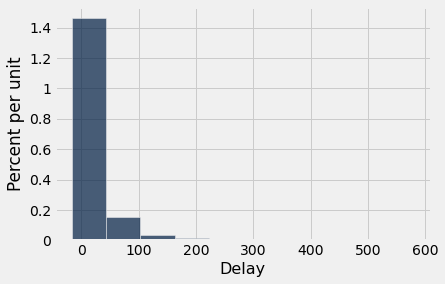

In [31]:
united.hist('Delay')

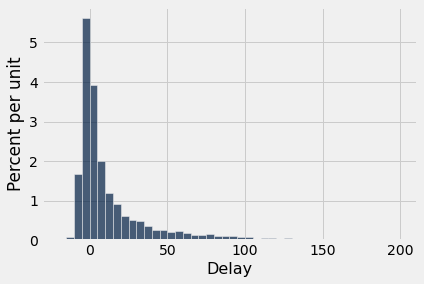

In [32]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [33]:
min(united.column('Delay'))

-16

In [34]:
max(united.column('Delay'))

580

In [35]:
np.average(united.column('Delay'))
# averages are pulled by outliers
# our average is pulled in the direction of our 10 hour late flight

16.658155515370705

In [36]:
np.median(united.column('Delay'))

2.0

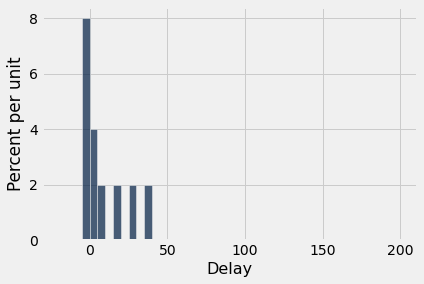

In [37]:
united.sample(10).hist('Delay', bins = united_bins)

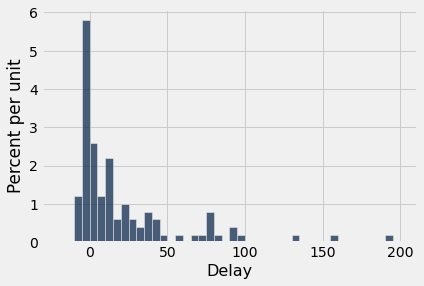

In [38]:
united.sample(100).hist('Delay', bins = united_bins)

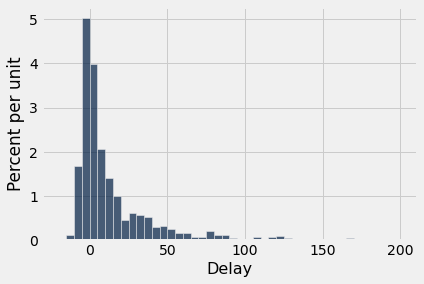

In [39]:
united.sample(1000).hist('Delay', bins = united_bins)

In [41]:
sample_10 = united.sample(10)
np.average(sample_10.column('Delay'))
#-0.4 is my sample statistic
#  average of my sample


-0.4

In [42]:
sample_1000 = united.sample(1000)
np.average(sample_1000.column('Delay'))
# 16 is my sample statistic
#  average of my sample


16.888

In [43]:
np.average(united.column('Delay'))
# averages are pulled by outliers
# our average is pulled in the direction of our 10 hour late flight

16.658155515370705

## Simulating Statistics ##

In [ ]:
np.median(united.column('Delay'))

In [ ]:
np.median(united.sample(10).column('Delay'))

In [ ]:
sample_median(10)

In [ ]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))